# Iris Data 🌼



Data Camp

### The Dataset

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris().data

The resulting data variable will contain a `2-dimensional array` of the feature measurements for each sample in the dataset.

In [3]:
# shape command: to get the dimensions of the data.
# Returns a tuple with two values: the number of rows and the number of columns in the data.
data.shape

(150, 4)

In [4]:
# Extract class labels
labels = load_iris().target

In [5]:
labels.shape

(150,)

The labels variable is being accessed and the `.shape` attribute is being called on it.

The `.shape` attribute returns the dimensions of the array or matrix that labels represents.

### Combine the data and the class labels

In [6]:
import numpy as np

In [7]:
# The data is a 2-d array -> reshape the labels to a 2-d array.
labels = np.reshape(labels,(150,1))

In [8]:
data = np.concatenate([data,labels],axis=-1)

In [9]:
data.shape

(150, 5)

In [10]:
import pandas as pd

In [11]:
# list w/ 5 strings
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']

In [12]:
# DATAFRAME -> dataset
dataset = pd.DataFrame(data,columns=names)

In [13]:
# Convert the numeric values as the flower names or species.
# 'inplace=True' parameter is used to modify the original dataset instead of creating a new one.
dataset['species'].replace(0, 'Iris-setosa',inplace=True)
dataset['species'].replace(1, 'Iris-versicolor',inplace=True)
dataset['species'].replace(2, 'Iris-virginica',inplace=True)

<ipython-input-13-b7dc6d0418a7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['species'].replace(0, 'Iris-setosa',inplace=True)


In [14]:
dataset.head(10) # first 10

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Analyze The Data

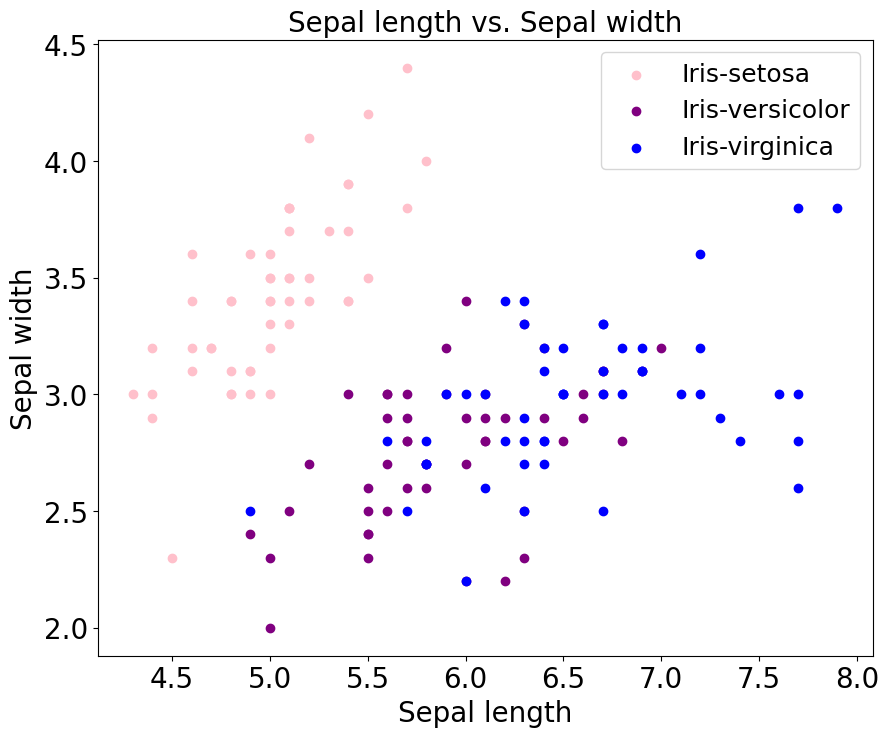

In [15]:
import matplotlib.pyplot as plt

plt.figure(4, figsize=(10, 8))

plt.scatter(data[:50, 0], data[:50, 1], c='pink', label='Iris-setosa')

plt.scatter(data[50:100, 0], data[50:100, 1], c='purple',label='Iris-versicolor')

plt.scatter(data[100:, 0], data[100:, 1], c='b',label='Iris-virginica')

plt.xlabel('Sepal length',fontsize=20)
plt.ylabel('Sepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Sepal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

There is a high `correlation` between the Iris setosa flowers w.r.t the sepal length and sepal width. On the other hand, there is less `correlation` between Iris versicolor and Iris virginica.

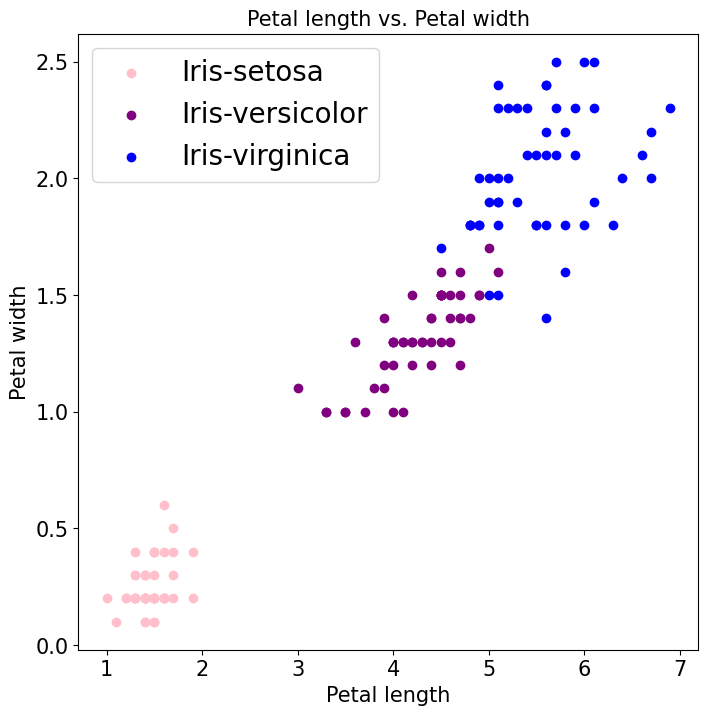

In [16]:
plt.figure(4, figsize=(8, 8))

plt.scatter(data[:50, 2], data[:50, 3], c='pink', label='Iris-setosa')

plt.scatter(data[50:100, 2], data[50:100, 3], c='purple',label='Iris-versicolor')

plt.scatter(data[100:, 2], data[100:, 3], c='b',label='Iris-virginica')
plt.xlabel('Petal length',fontsize=15)
plt.ylabel('Petal width',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Petal length vs. Petal width',fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

There is a strong `correlation` for setosa flowers which are densely clustered together.

In [36]:
# iloc: function is used to select a subset of the dataset
# corr() function is then applied to this subset of the dataset to calculate the correlation matrix.
dataset.iloc[:,:2].corr()

,sepal-length,sepal-width
sepal-length,1.00000,-0.11757
sepal-width,-0.11757,1.00000


In [28]:
#This function computes pairwise correlations between columns, excluding NA/null values.
numerical_features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
dataset.iloc[:50,:][numerical_features].corr() #setosa

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.742547,0.267176,0.278098
sepal-width,0.742547,1.000000,0.177700,0.232752
petal-length,0.267176,0.177700,1.000000,0.331630
petal-width,0.278098,0.232752,0.331630,1.000000


In [29]:
# Select only numerical features for correlation calculation
numerical_features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
dataset.iloc[50:100,:][numerical_features].corr() #versicolor

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.525911,0.754049,0.546461
sepal-width,0.525911,1.000000,0.560522,0.663999
petal-length,0.754049,0.560522,1.000000,0.786668
petal-width,0.546461,0.663999,0.786668,1.000000


In [30]:
# Select only numerical features for correlation calculation
numerical_features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
dataset.iloc[100:,:][numerical_features].corr() #virginica

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,0.457228,0.864225,0.281108
sepal-width,0.457228,1.000000,0.401045,0.537728
petal-length,0.864225,0.401045,1.000000,0.322108
petal-width,0.281108,0.537728,0.322108,1.000000


### Visualize the data

<ipython-input-37-8df3bcdd4885>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset.hist(ax=ax)


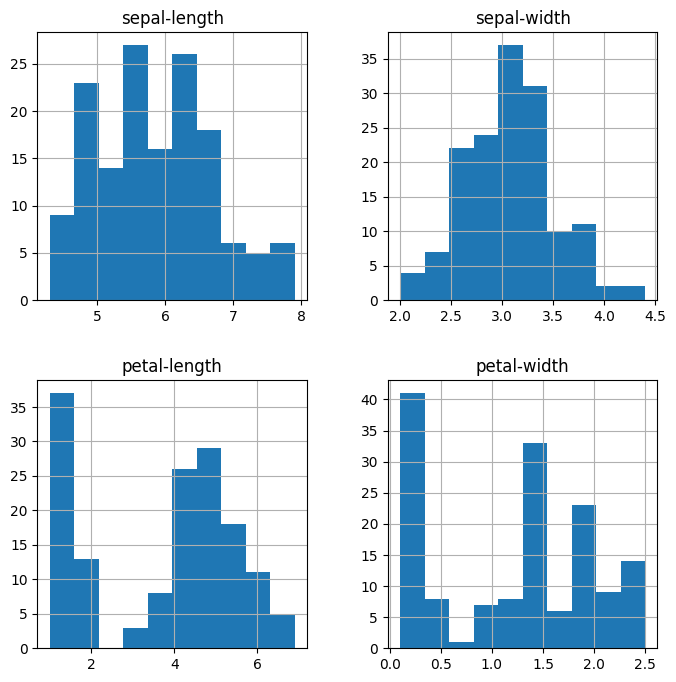

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

In [38]:
# describe(): descriptive statistics of the dataset, including count, mean, standard deviation, minimum, and maximum values for each column in the dataset.
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
# size() method:  used to count the number of occurrences of each unique value in the species column.
print(dataset.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Normalize the data

In [40]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Split the data

In [41]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(dataset.iloc[:,:3], dataset.iloc[:,3], test_size=0.2, random_state=42)

In [42]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((120, 3), (120,), (30, 3), (30,))

### The KNN Model

The `KNeighborsClassifier` is a machine learning algorithm used for classification tasks, where the goal is to predict the class of a given input based on its similarity to other examples in a labeled dataset. By importing this class, the user can create an instance of the `KNeighborsClassifier` and use it to train a model on a dataset and make predictions on new data.

In [65]:
from sklearn.neighbors import KNeighborsClassifier
# Split the data using the 'species' column as the target
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(
    dataset[['sepal-length', 'sepal-width', 'petal-length']],  # Features
    dataset['species'],  # Target variable (species)
    test_size=0.2,
    random_state=42
)
neighbors = np.arange(1, 9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

# Loop through different values of neighbors
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)  # Create KNN classifier with k neighbors
    knn.fit(train_data, train_label)  # Fit the model
    train_accuracy[i] = knn.score(train_data, train_label)  # Calculate and store training accuracy
    test_accuracy[i] = knn.score(test_data, test_label)  # Calculate and store testing accuracy

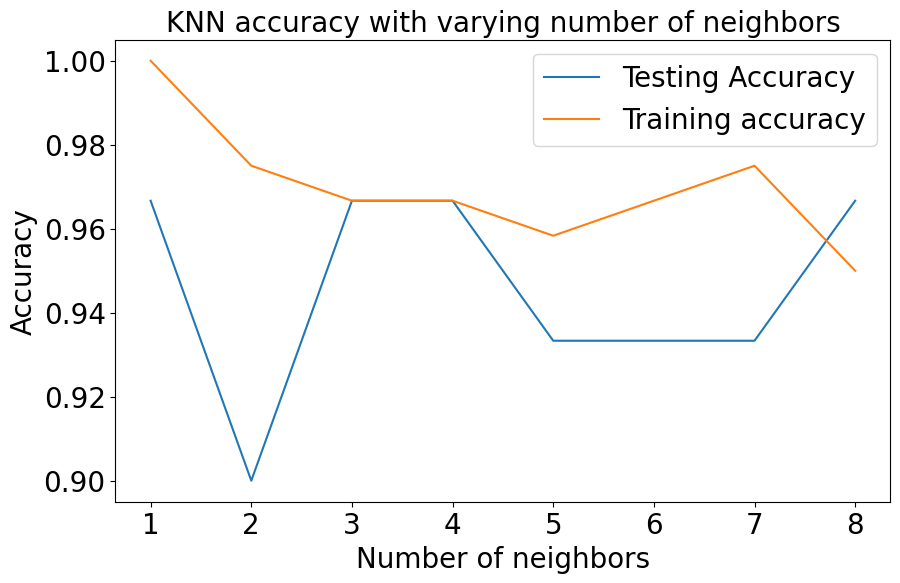

In [66]:
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(train_data, train_label)

#Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

#Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

### Evaluate the Model

In [68]:
test_accuracy

0.9666666666666667

### Confusion Matrix

In [69]:
prediction = knn.predict(test_data)

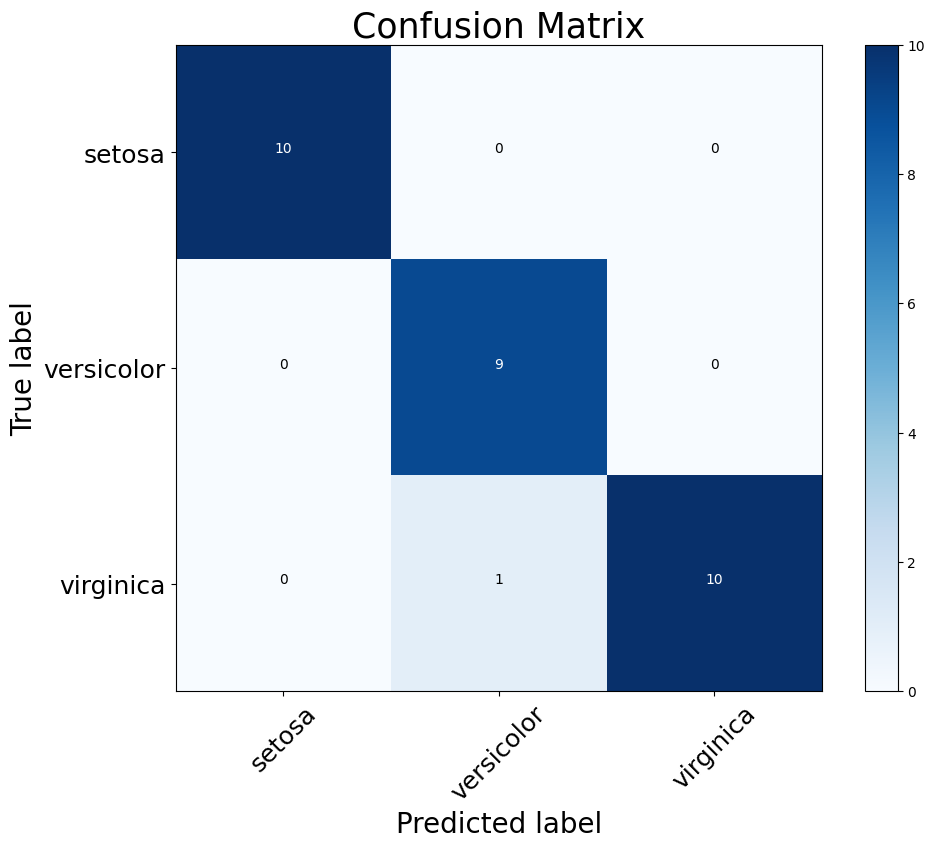

In [70]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix # Import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=20)
    plt.xlabel('Predicted label',fontsize=20)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
class_names = load_iris().target_names


# Compute confusion matrix
cnf_matrix = confusion_matrix(test_label, prediction) # Now confusion_matrix is defined
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.title('Confusion Matrix',fontsize=25)
plt.show()

### Classification Report

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(test_label, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

